In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import shutil

In [24]:
# Define the size to which you want to resize the images
IMG_SIZE = (224,224)

# Define the directory containing your dataset
data_dir = "./Dataset/Pablo"
save_dir = "./Dataset/Prepro1"
# Loop through all the images in the dataset directory
for filename in os.listdir(data_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Open the image and resize it to the desired size
        img = Image.open(os.path.join(data_dir, filename))
        img = img.resize(IMG_SIZE)

        # Convert the image to RGB
        img = img.convert("RGB")

        # Convert the image to a numpy array and normalize the pixel values
        img_arr = np.array(img) / 255.0
        
        save_filename=os.path.join(save_dir,filename)
        np.save(save_filename, img_arr)

In [25]:
# Define the size to which you want to resize the images
IMG_SIZE = (224, 224)

# Define the directory containing your dataset
data_dir = "./Dataset/Osama"
save_dir = "./Dataset/Prepro"
# Loop through all the images in the dataset directory
for filename in os.listdir(data_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Open the image and resize it to the desired size
        img = Image.open(os.path.join(data_dir, filename))
        img = img.resize(IMG_SIZE)

        # Convert the image to RGB
        img = img.convert("RGB")

        # Convert the image to a numpy array and normalize the pixel values
        img_arr = np.array(img) / 255.0
        
        save_filename=os.path.join(save_dir,filename)
        np.save(save_filename, img_arr)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "./Dataset/Preprocessed"
# Define the number of classes in your dataset
num_classes = 2

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

X = []
y = []

for filename in os.listdir(data_dir):
    if filename.endswith(".npy"):
        # Load the preprocessed image from disk
        img = np.load(os.path.join(data_dir, filename))

        # Extract the label from the filename (assuming the label is the first part of the filename)
        try:
            label = int(filename.split("_")[0])
        except ValueError:
            print(f"Invalid filename: {filename}")
            continue

        # Augment the image using the data generator
        img = img.reshape((1,) + img.shape)
        for batch in datagen.flow(img, batch_size=1):
            augmented_img = batch[0]
            break

        # Append the preprocessed image and its label to the X and y lists
        X.append(augmented_img)
        y.append(label)


In [6]:
# Convert the X and y lists to numpy arrays
X = np.array(X)
y = np.array(y)

In [7]:
# Convert the labels to one-hot encoding
y = np.eye(num_classes)[y]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

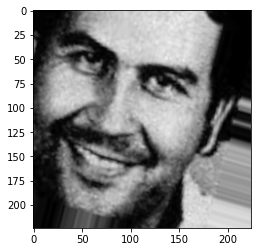

In [9]:
plt.imshow(X_test[10])
#y_test[410]

In [10]:
print(X_train.shape)
print(X_test.shape)

(78, 224, 224, 3)
(20, 224, 224, 3)


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape of the images
input_shape = (224, 224, 3)

# Define the DeepFace model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [12]:
# Compile the model with an appropriate loss function and optimizer
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, batch_size=10,epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
8/8 [==============================] - 2s 310ms/step - loss: 0.5185 - accuracy: 0.7821 - val_loss: 0.3704 - val_accuracy: 0.9000
Epoch 2/10
8/8 [==============================] - 2s 309ms/step - loss: 0.4464 - accuracy: 0.7949 - val_loss: 0.1741 - val_accuracy: 0.9500
Epoch 3/10
8/8 [==============================] - 2s 310ms/step - loss: 0.2071 - accuracy: 0.9231 - val_loss: 0.0808 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 3s 324ms/step - loss: 0.2453 - accuracy: 0.9103 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 3s 335ms/step - loss: 0.3002 - accuracy: 0.9103 - val_loss: 0.2783 - val_accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 3s 325ms/step - loss: 0.1760 - accuracy: 0.9359 - val_loss: 0.7033 - val_accuracy: 0.9000
Epoch 7/10
8/8 [==============================] - 2s 312ms/step - loss: 0.0436 - accuracy: 0.9744 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 8/10
8/8 [====

In [16]:
class_names = ['Osama','Pablo']

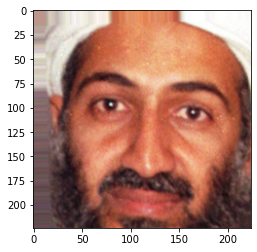

In [17]:
import random
n=random.randint(0,20)
plt.imshow(X_test[n])

In [18]:
prediction=model.predict(X_test)

1/1 [==============================] - 0s 199ms/step


In [20]:
Pred_obj=class_names[np.argmax(prediction[n])]
print("Criminal detected: ",Pred_obj)

Criminal detected:  Osama


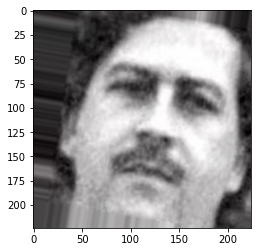

In [27]:
import random
n=random.randint(0,20)
plt.imshow(X_test[n])

In [28]:
Pred_obj=class_names[np.argmax(prediction[n])]
print("Criminal detected: ",Pred_obj)

Criminal detected:  Pablo


In [26]:
prediction

array([[1.0000000e+00, 3.8968728e-11],
       [4.9381017e-15, 1.0000000e+00],
       [9.9999988e-01, 9.1759922e-08],
       [1.5184843e-16, 1.0000000e+00],
       [1.0000000e+00, 7.3240147e-09],
       [1.0000000e+00, 1.1077287e-12],
       [1.3701283e-09, 1.0000000e+00],
       [1.0993084e-14, 1.0000000e+00],
       [6.9703668e-01, 3.0296335e-01],
       [2.0302370e-08, 1.0000000e+00],
       [7.7155008e-16, 1.0000000e+00],
       [1.0000000e+00, 1.9284290e-08],
       [1.3863889e-06, 9.9999857e-01],
       [1.5478440e-11, 1.0000000e+00],
       [1.1067201e-18, 1.0000000e+00],
       [2.2283977e-19, 1.0000000e+00],
       [9.9998856e-01, 1.1495508e-05],
       [2.0672942e-14, 1.0000000e+00],
       [9.9999976e-01, 1.8318698e-07],
       [3.2061305e-17, 1.0000000e+00]], dtype=float32)

In [29]:
model.save("deepfacemodel.hdf5")